In [ ]:
from google.colab import files 
import pandas as pd 
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score



In [ ]:
uploaded = files.upload() #esto me permite subir manualmente un dataset desde un archivo local

Saving logistica_data.csv to logistica_data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['logistica_data.csv'])) 

In [ ]:
df.describe()

,cantidad_vendida,mes,anio,facturacion,inflacion,desempleo,numero_pedidos,visitas_sitio_web
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,74.725490,6.323529,2017.764706,29925.911765,0.686765,8.308824,149.186275,1513.196078
std,15.243344,3.464564,2.474329,11144.247450,0.653060,1.252886,30.816201,284.864569
min,50.000000,1.000000,2014.000000,11402.000000,-0.550000,5.700000,102.000000,1053.000000
25%,63.000000,3.000000,2016.000000,19670.750000,0.352500,7.400000,120.250000,1274.500000
50%,73.000000,6.000000,2018.000000,29687.000000,0.570000,8.000000,151.500000,1490.000000
75%,89.750000,9.000000,2020.000000,38909.250000,0.872500,9.100000,175.750000,1788.250000
max,99.000000,12.000000,2022.000000,49877.000000,2.710000,11.200000,199.000000,1997.000000


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)

SimpleImputer(strategy='most_frequent')

In [ ]:
df.isnull().sum()

cantidad_vendida     0
mes                  0
anio                 0
facturacion          0
inflacion            0
desempleo            0
numero_pedidos       0
visitas_sitio_web    0
dtype: int64

In [ ]:
df.columns

Index(['cantidad_vendida', 'mes', 'anio', 'facturacion', 'inflacion',
       'desempleo', 'numero_pedidos', 'visitas_sitio_web'],
      dtype='object')

In [ ]:
df['future'] = df['facturacion'].shift(-6)

In [ ]:
dfEntrenamiento = df[:-6]

In [ ]:
dfPred = df[-6:]

In [ ]:
dfEntrenamiento

,cantidad_vendida,mes,anio,facturacion,inflacion,desempleo,numero_pedidos,visitas_sitio_web,future
0,70,1,2014,11517,2.44,6.7,145,1953,22047.0
1,64,2,2014,24991,1.66,7.0,103,1349,37513.0
2,94,3,2014,34628,0.58,6.3,147,1114,46262.0
3,67,4,2014,17250,-0.06,6.8,126,1097,34211.0
4,50,5,2014,40112,0.32,6.8,150,1701,49877.0
...,...,...,...,...,...,...,...,...,...
91,54,8,2021,20665,0.85,9.4,122,1801,29059.0
92,63,9,2021,44361,0.46,9.3,169,1459,35788.0
93,81,10,2021,12876,1.04,7.9,115,1484,25640.0
94,66,11,2021,25447,0.25,7.4,114,1908,36769.0


In [ ]:
dfPred

,cantidad_vendida,mes,anio,facturacion,inflacion,desempleo,numero_pedidos,visitas_sitio_web,future
96,81,1,2022,36769,1.78,7.3,186,1633,NaN
97,64,2,2022,29059,1.47,7.4,174,1253,NaN
98,89,3,2022,35788,1.11,7.7,108,1570,NaN
99,66,4,2022,25640,0.49,7.7,176,1268,NaN
100,54,5,2022,36769,0.46,7.3,114,1908,NaN
101,63,6,2022,36769,0.46,7.3,115,1314,NaN


In [ ]:
#Columnas a usar para la prediccion
features = dfEntrenamiento[
    ['mes',
       'anio','cantidad_vendida', 'inflacion',
       'desempleo','numero_pedidos', 'visitas_sitio_web']
]
features = imp.fit_transform(features)
#columna a predecir
target = dfEntrenamiento['future']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [ ]:
dtc=LinearRegression()
model = dtc.fit(X_train, y_train)

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
y_test

26    44570.0
84    17277.0
2     46262.0
55    21754.0
68    12215.0
81    17785.0
16    24206.0
78    49069.0
54    14639.0
66    16617.0
53    23821.0
88    25447.0
71    14670.0
13    43167.0
7     49643.0
30    15048.0
22    29321.0
24    49841.0
33    36201.0
8     26720.0
Name: future, dtype: float64

In [ ]:
r2_score(y_test, y_pred)

0.04884555428808657

In [ ]:
dfPred['future'] = model.predict(dfPred[
    ['mes',
       'anio','cantidad_vendida', 'inflacion',
       'desempleo', 'numero_pedidos', 'visitas_sitio_web']
])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


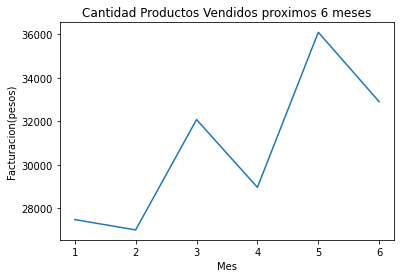

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.plot(dfPred['mes'], dfPred['future'])
plt.xlabel('Mes')
plt.ylabel('Facturacion(pesos)')
plt.title('Cantidad Productos Vendidos proximos 6 meses')
plt.show()

In [ ]:
dfPred.to_csv(r'pred.csv')
